# TUTORIAL 1: Read and plot a spectrum from ESPRESSO

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 50
rcParams["font.size"] = 10

In [31]:
from actin2 import actin2
actin = actin2.ACTIN()
print(actin.__doc__)

The ACTIN class. Reads fits files and calculates activity indices.

    Attributes:
        ReadSpec (actin2.ReadSpec) : Object that reads spectrum and   
            headers.
        IndTable (actin2.IndTable) : Object containing the 
            indices table.
        ProcessSpec (actin2.ProcessSpec) : Object to process the 
            spectrum.
    


In [32]:
import os, glob
files = glob.glob(os.path.join(os.pardir, os.pardir, os.pardir, "actin2/test/ESPRESSO", "*_S1D_A.fits"))
files

['../../../actin2/test/ESPRESSO/r.ESPRE.2018-09-03T08:38:21.545_S1D_A.fits']

In [33]:
indices = ['I_CaII']

Running ReadSpec
loaded file: ../../../actin2/test/ESPRESSO/r.ESPRE.2018-09-03T08:38:21.545_S1D_A.fits
loaded instr: ESPRESSO
Reading spectrum file
Reading CCF file


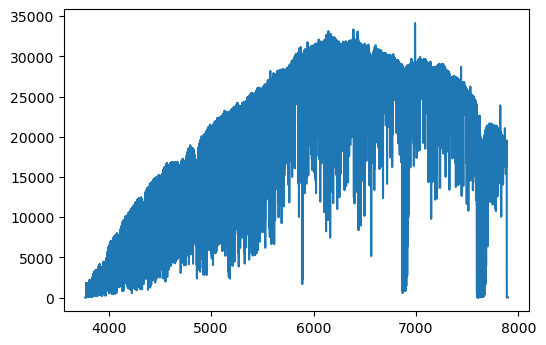

In [34]:
actin.ReadSpec(files[0]).plot(show=False)